# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response['coord']['lat']
        city_lng = weather_response['coord']['lon']
        city_max_temp = weather_response['main']['temp_max']
        city_humidity = weather_response['main']['humidity']
        city_clouds = weather_response['clouds']['all']
        city_wind = weather_response['wind']['speed']
        city_country = weather_response['name']
        city_date = weather_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(1)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | winslow
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | san rafael
Processing Record 7 of Set 1 | bonavista
Processing Record 8 of Set 1 | nome
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | aswan
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | nioro
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | vao
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | pueblo nuevo
Processing Record 18 of Set 1 | teguldet
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | bobon
Processing Record 23 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,winslow,35.0242,-110.6974,9.10,15,0,3.60,Winslow,1679963334
1,takoradi,4.8845,-1.7554,26.20,85,91,3.21,Takoradze,1679963602
2,bredasdorp,-34.5322,20.0403,14.93,71,9,1.25,Bredasdorp,1679963070
3,busselton,-33.6500,115.3333,14.55,74,0,4.33,Busselton,1679963069
4,qaanaaq,77.4840,-69.3632,-23.91,62,34,2.96,Qaanaaq,1679963235


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,winslow,35.0242,-110.6974,9.10,15,0,3.60,Winslow,1679963334
1,takoradi,4.8845,-1.7554,26.20,85,91,3.21,Takoradze,1679963602
2,bredasdorp,-34.5322,20.0403,14.93,71,9,1.25,Bredasdorp,1679963070
3,busselton,-33.6500,115.3333,14.55,74,0,4.33,Busselton,1679963069
4,qaanaaq,77.4840,-69.3632,-23.91,62,34,2.96,Qaanaaq,1679963235


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

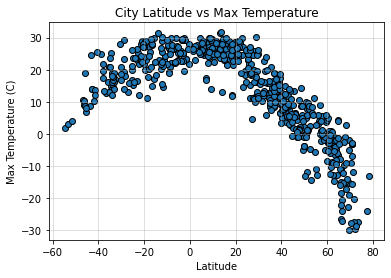

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

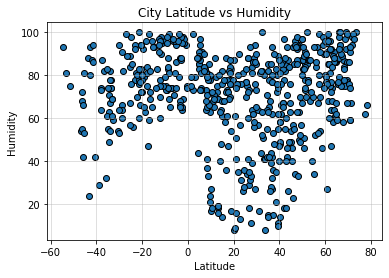

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

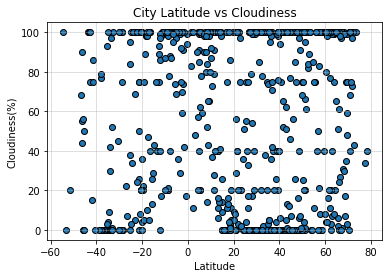

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

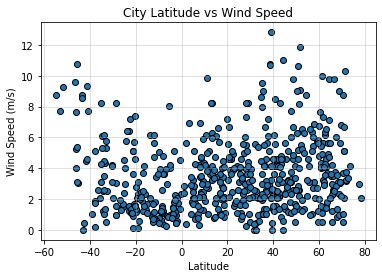

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_loc, title, x_label, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annotate_loc,fontsize=15,color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.5)

    print("pvalue",pvalue)
    print("rvalue",rvalue)

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,winslow,35.0242,-110.6974,9.10,15,0,3.60,Winslow,1679963334
1,takoradi,4.8845,-1.7554,26.20,85,91,3.21,Takoradze,1679963602
4,qaanaaq,77.4840,-69.3632,-23.91,62,34,2.96,Qaanaaq,1679963235
6,bonavista,48.6499,-53.1147,-0.57,94,97,9.79,Bonavista,1679963608
7,nome,64.5011,-165.4064,-6.58,86,100,9.77,Nome,1679963151


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,14.93,71,9,1.25,Bredasdorp,1679963070
3,busselton,-33.6500,115.3333,14.55,74,0,4.33,Busselton,1679963069
5,san rafael,-34.6177,-68.3301,25.35,49,0,6.12,San Rafael,1679963347
8,mataura,-46.1927,168.8643,10.27,68,55,4.05,Mataura,1679963028
13,vao,-22.6667,167.4833,25.13,81,100,7.17,Vao,1679963617


###  Temperature vs. Latitude Linear Regression Plot

pvalue 3.957773394722767e-162
rvalue -0.9098173611448745


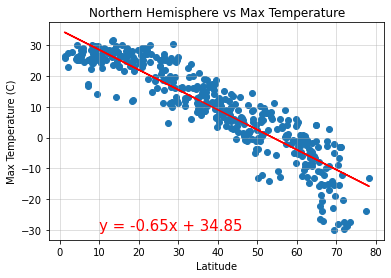

In [16]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-30), "Northern Hemisphere vs Max Temperature",
                 'Latitude', 'Max Temperature (C)')

pvalue 1.7033550345931086e-25
rvalue 0.698800816377389


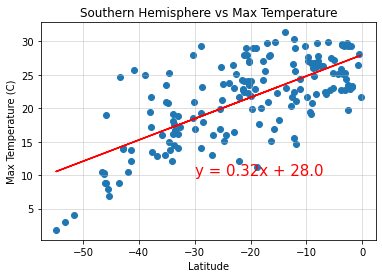

In [17]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 10), "Southern Hemisphere vs Max Temperature",
                 'Latitude', 'Max Temperature (C)')

**Discussion about the linear relationship:** These scatter plots showed correlations betweeb the temp of the cities when compared to the city's latitude. In the northern hemisphere there was a negative correlation, whereas in the southern hemisphere there was a postivie correlation. This data means represents the temps get warmer towards the equator and colder towards the poles. 

### Humidity vs. Latitude Linear Regression Plot

pvalue 4.2067791561936943e-07
rvalue 0.24357853966476214


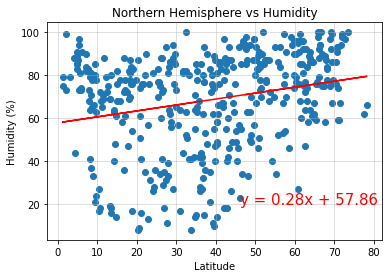

In [18]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (46, 20), "Northern Hemisphere vs Humidity",
                 'Latitude', 'Humidity (%)')

pvalue 8.453119114736657e-07
rvalue 0.37233495912326103


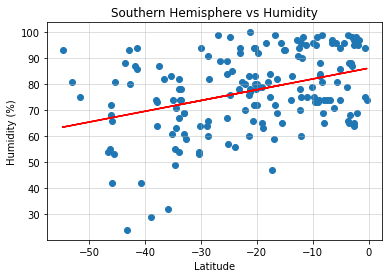

In [19]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 10), "Southern Hemisphere vs Humidity",
                 'Latitude', 'Humidity (%)'
)

**Discussion about the linear relationship:** Both scatter plots had a low r-value, there is a minimal relationship between the latitude of the cities and their humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

pvalue 0.22305147353340615
rvalue 0.05950810825904521


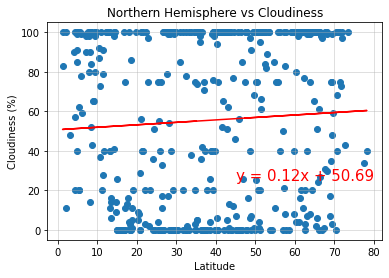

In [20]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (45, 25), "Northern Hemisphere vs Cloudiness",
                 'Latitude', 'Cloudiness (%)')

pvalue 2.4685048893569566e-06
rvalue 0.3572679033423856


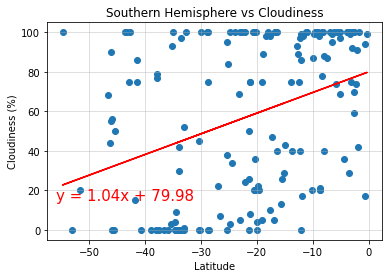

In [21]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-56, 15), "Southern Hemisphere vs Cloudiness",
                 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** The northern and southern scratter plots had low r-values and with the display above, the does not seem to be a relationship between and cloudiness of a city and its lat& long

### Wind Speed vs. Latitude Linear Regression Plot

pvalue 0.005253248818559562
rvalue 0.13580197983295086


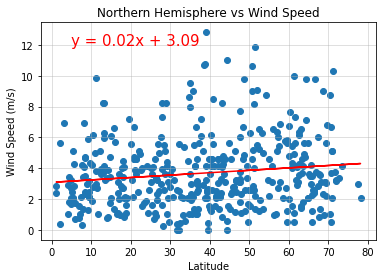

In [22]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (5, 12), "Northern Hemisphere vs Wind Speed",
                 'Latitude', 'Wind Speed (m/s)')

pvalue 4.381853191486786e-10
rvalue -0.46156720252571254


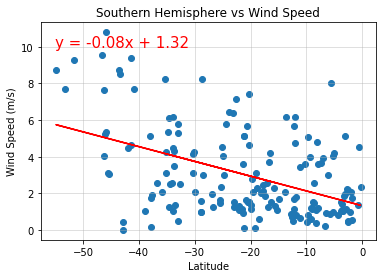

In [23]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-55, 10), "Southern Hemisphere vs Wind Speed",
                 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** 
The northern and southern plots had low r-values according to the displayed data there is no relationship between the wind speed of the city and its latitude.